In [28]:
import os
import time
import cv2
import numpy as np
from model.yolo_model import YOLO

In [29]:
def process_image(img):

    image = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_CUBIC)
    image = np.array(image, dtype='float32')
    image /= 255.
    image = np.expand_dims(image, axis=0)

    return image

In [30]:
def get_classes(file):
    """Get classes name.

    # Argument:
        file: classes name for database.

    # Returns
        class_names: List, classes name.

    """
    with open(file) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]

    return class_names

In [64]:
def draw(image, boxes, scores, classes, all_classes):

    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 2)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 0, 255), 2,
                    cv2.LINE_AA)

        print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))

    print()

In [65]:
def detect_image(image, yolo, all_classes):

    pimage = process_image(image)

    start = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    end = time.time()

    print('time: {0:.2f}s'.format(end - start))

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image

In [70]:
yolo = YOLO(0.4, 0.5)
file = r'data/coco_classes.txt'
all_classes = get_classes(file)

### Detecting Images


In [71]:
f = 'car_bike_people.jpg'
path = 'images/test/'+f
image = cv2.imread(path)
image = detect_image(image, yolo, all_classes)
cv2.imwrite('images/res/' + f, image)

time: 42.45s
class: person, score: 0.89
box coordinate x,y,w,h: [1235.36947966  161.84969777  164.22137171  853.88181782]
class: person, score: 0.58
box coordinate x,y,w,h: [116.8613717  359.99895126 164.61005509 535.08209682]
class: person, score: 0.40
box coordinate x,y,w,h: [672.07295895 352.3174966  202.07317472 403.24066722]
class: bicycle, score: 0.96
box coordinate x,y,w,h: [570.22708654 498.06843853 385.9621048  399.34660882]
class: car, score: 1.00
box coordinate x,y,w,h: [792.19069481 348.67566249 442.67685413 206.35135348]
class: car, score: 0.95
box coordinate x,y,w,h: [-16.9356972  371.06676248 490.57969451 142.78960736]
class: car, score: 0.89
box coordinate x,y,w,h: [546.3083148  365.35538784 133.75280052  66.33666522]



True

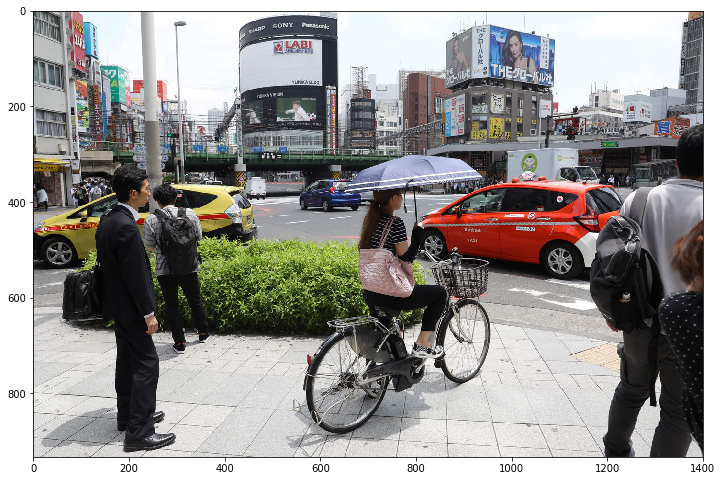

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    
source=  cv2.imread(r'images\test\car_bike_people.jpg')  
result = cv2.imread(r'images\res\car_bike_people.jpg')

display(source)

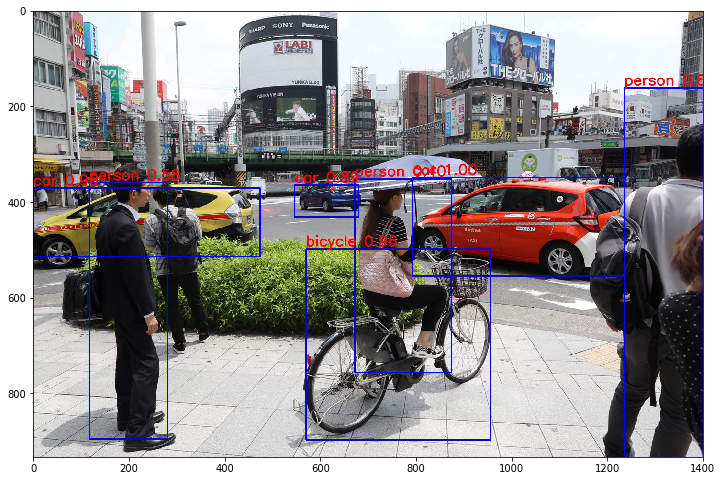

In [73]:
display(result)